# Install conda on your Colab environment

Ignore this first cell if you are running the notebook in a local environment.

One can still run it locally but it will have no effect.

In [52]:
# Run this cell first - it will install a conda distribution (mamba)
# on your Drive then restart the kernel automatically 
# (don't worry about the crashing/restarting kernel messages)
# It HAS to be runned FIRST everytime you use the notebook in colab

import os
import sys
RunningInCOLAB  = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    !pip install -q condacolab
    import condacolab
    condacolab.install()

# Set up your Colab or local environment
# Then import libraries

Run this cell in both cases of use (local or Colab)

In [2]:
import os
import sys
RunningInCOLAB  = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    
    # Check everything is fine with conda in Colab
    import condacolab
    condacolab.check()
    
    # Mount your drive environment in the colab runtime
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    
    # Change this variable to your path on Google Drive to which the repo has been cloned
    # If you followed the colab notebook 'repo_cloning.ipynb', nothing to change here
    repo_path_in_drive = '/content/drive/My Drive/Github/amn_release/'
    # Change directory to your repo cloned in your drive
    DIRECTORY = repo_path_in_drive
    os.chdir(repo_path_in_drive)
    # Copy the environment given in the environment_amn_light.yml
    !mamba env update -n base -f environment_amn_light.yml
    
    # This is one of the few Colab-compatible font
    font = 'Liberation Sans'
    
else:
    
    # In this case the local root of the repo is our working directory
    DIRECTORY = './'
    font = 'arial'

# printing the working directory files. One can check you see the same folders and files as in the git webpage.
print(os.listdir(DIRECTORY))

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.metrics import r2_score

# FORMAT = 'png'
FORMAT = 'svg'

['README.md', 'Duplicate_Model.ipynb', 'Dataset_experimental', 'Tutorial.ipynb', '.ipynb_checkpoints', '.git', 'Build_Model_RC.ipynb', 'Build_Model_AMN_KO.ipynb', 'biolog_simulations.npy', 'environment_amn_light.yml', 'Build_Experimental.ipynb', 'Reservoir', 'Build_Model_MM.ipynb', 'Dataset_model', 'Figures.ipynb', 'Result', 'Figures', '.gitignore', 'LICENSE', 'Build_Model_ANN_Dense.ipynb', 'Build_Dataset.ipynb', 'Library', 'Dataset_input', 'Functions', 'Build_Dataset_KO.ipynb', 'environment_amn.yml', 'Build_Model_AMN.ipynb', '.DS_Store']


## Figure 2

In [59]:
df_QP_UB = pd.read_csv("Result/Raw_data/AMN_QP_UB_core.csv")
df_LP_UB = pd.read_csv("Result/Raw_data/AMN_LP_UB_core.csv")
df_QP_EB = pd.read_csv("Result/Raw_data/AMN_QP_EB_core.csv")
df_LP_EB = pd.read_csv("Result/Raw_data/AMN_LP_EB_core.csv")
df_wt_UB = pd.read_csv("Result/Raw_data/AMN_wt_UB_core.csv")

df_QP_UB_IML1515 = pd.read_csv("Result/Raw_data/AMN_QP_UB_IML1515.csv") 
df_LP_UB_IML1515 = pd.read_csv("Result/Raw_data/AMN_LP_UB_IML1515.csv")
df_wt_UB_IML1515 = pd.read_csv("Result/Raw_data/AMN_wt_UB_IML1515.csv")

ANN_UB_core = pd.read_csv('Result/Raw_data/core_UB_ANN.csv')
ANN_EB_core = pd.read_csv('Result/Raw_data/core_EB_ANN.csv')
ANN_UB_iML1515 = pd.read_csv('Result/Raw_data/iML1515_UB_ANN.csv')

plt.close('all')
fig2, axs = plt.subplots(nrows=2, ncols=3,
                         figsize=(25, 15))
sns.set_theme(font=font, style="whitegrid", palette="colorblind", font_scale=1.5)

### UB Loss
sns.lineplot(x='epoch', y='val_loss', data=df_QP_UB, ax=axs[0, 0], label='AMN - QP')
sns.lineplot(x='epoch', y='val_loss', data=df_LP_UB, ax=axs[0, 0], label='AMN - LP')
sns.lineplot(x='epoch', y='val_loss', data=df_wt_UB, ax=axs[0, 0], color='m', label='AMN - Wt')
ANN_UB_core["Loss Stderr"] = 1.96*(ANN_UB_core["Loss_Dev"] / 10)
axs[0, 0].plot(ANN_UB_core["Epoch"], ANN_UB_core["Loss"], label="ANN", color='y')
axs[0, 0].fill_between(ANN_UB_core["Epoch"], ANN_UB_core["Loss"]-ANN_UB_core["Loss Stderr"], ANN_UB_core["Loss"]+ANN_UB_core["Loss Stderr"], alpha=0.2, color='y')
axs[0, 0].set_title('E. coli core, UB', fontsize=25)
axs[0, 0].set(xlabel=None, ylabel=None)
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")
axs[0, 0].legend(loc='upper right')
axs[0, 0].set_ylabel("Loss", fontsize=18)
axs[0, 0].set_xlabel("Epochs", fontsize=18) 
axs[0, 0].set_xlim(1,100)

### EB loss
sns.lineplot(x='epoch', y='val_loss', data=df_QP_EB, ax=axs[0, 1], label='AMN - QP')
sns.lineplot(x='epoch', y='val_loss', data=df_LP_EB, ax=axs[0, 1], label='AMN - LP')
ANN_EB_core["Loss Stderr"] = 1.96*(ANN_EB_core["Loss_Dev"] / 10)
axs[0, 1].plot(ANN_EB_core["Epoch"], ANN_EB_core["Loss"], label="ANN", color='y')
axs[0, 1].fill_between(ANN_EB_core["Epoch"], ANN_EB_core["Loss"]-ANN_EB_core["Loss Stderr"], ANN_EB_core["Loss"]+ANN_EB_core["Loss Stderr"], alpha=0.2, color='y')
axs[0, 1].set_title('E. coli core, EB', fontsize=25)
axs[0, 1].set(xlabel=None, ylabel=None)
axs[0, 1].set_xscale("log")
axs[0, 1].set_yscale("log")
axs[0, 1].legend(loc='upper right')
axs[0, 1].set_ylabel("Loss", fontsize=18)
axs[0, 1].set_xlabel("Epochs", fontsize=18)
axs[0, 1].set_xlim(1,100)

### IML1515 Loss
sns.lineplot(x='epoch', y='val_loss', data=df_QP_UB_IML1515, ax=axs[0, 2], label='AMN - QP')
sns.lineplot(x='epoch', y='val_loss', data=df_LP_UB_IML1515, ax=axs[0, 2], label='AMN - LP')
sns.lineplot(x='epoch', y='val_loss', data=df_wt_UB_IML1515, ax=axs[0, 2], color='m', label='AMN - Wt')
ANN_UB_iML1515["Loss Stderr"] = 1.96*(ANN_UB_iML1515["Loss_Dev"] / 10)
axs[0, 2].plot(ANN_UB_iML1515["Epoch"], ANN_UB_iML1515["Loss"], label="ANN", color='y')
axs[0, 2].fill_between(ANN_UB_iML1515["Epoch"], ANN_UB_iML1515["Loss"]-ANN_UB_iML1515["Loss Stderr"], ANN_UB_iML1515["Loss"]+ANN_UB_iML1515["Loss Stderr"], alpha=0.2, color='y')
axs[0, 2].set_title('iML1515, UB', fontsize=25)
axs[0, 2].set(xlabel=None, ylabel=None)
axs[0, 2].set_xscale("log")
axs[0, 2].set_yscale("log")
axs[0, 2].legend(loc='upper right')
axs[0, 2].set_xlabel("Epochs", fontsize=18)
axs[0, 2].set_ylabel("Loss", fontsize=18)
axs[0, 2].set_xlim(1,100)

### UB r2
sns.lineplot(x='epoch', y='val_r2', data=df_QP_UB, ax=axs[1, 0], label='AMN - QP')
sns.lineplot(x='epoch', y='val_r2', data=df_LP_UB, ax=axs[1, 0], label='AMN - LP')
sns.lineplot(x='epoch', y='val_r2', data=df_wt_UB, ax=axs[1, 0], color='m', label='AMN - Wt')
ANN_UB_core["Q2 Stderr"] = 1.96*(ANN_UB_core["Dev"] / 10)
axs[1, 0].plot(ANN_UB_core["Epoch"], ANN_UB_core["Q2"], label="ANN", color='y')
axs[1, 0].fill_between(ANN_UB_core["Epoch"], ANN_UB_core["Q2"]-ANN_UB_core["Q2 Stderr"], ANN_UB_core["Q2"]+ANN_UB_core["Q2 Stderr"], alpha=0.2, color='y')
axs[1, 0].set(xlabel=None, ylabel=None)
axs[1, 0].legend(loc='lower right')
axs[1, 0].set_xscale("log")
axs[1, 0].set_xlabel("Epochs", fontsize=18)
axs[1, 0].set_ylabel("$Q^2$", fontsize=18)
axs[1, 0].set_xlim(1,100)
axs[1, 0].set_ylim(0,1)

### EB r2
sns.lineplot(x='epoch', y='val_r2', data=df_QP_EB, ax=axs[1, 1], label='AMN - QP')
sns.lineplot(x='epoch', y='val_r2', data=df_LP_EB, ax=axs[1, 1], label='AMN - LP')
ANN_EB_core["Q2 Stderr"] = 1.96*(ANN_EB_core["Dev"] / 10)
axs[1, 1].plot(ANN_EB_core["Epoch"], ANN_EB_core["Q2"], label="ANN", color='y')
axs[1, 1].fill_between(ANN_EB_core["Epoch"], ANN_EB_core["Q2"]-ANN_EB_core["Q2 Stderr"], ANN_EB_core["Q2"]+ANN_EB_core["Q2 Stderr"], color='y', alpha=0.2)
axs[1, 1].set(xlabel=None, ylabel=None)
axs[1, 1].legend(loc='lower right')
axs[1, 1].set_xscale("log")
axs[1, 1].set_xlabel("Epochs", fontsize=18)
axs[1, 1].set_ylabel("$Q^2$", fontsize=18)
axs[1, 1].set_xlim(1,100)
axs[1, 1].set_ylim(0,1)

### IML1515 r2
sns.lineplot(x='epoch', y='val_r2', data=df_QP_UB_IML1515, ax=axs[1, 2], label='AMN - QP')
sns.lineplot(x='epoch', y='val_r2', data=df_LP_UB_IML1515, ax=axs[1, 2], label='AMN - LP')
sns.lineplot(x='epoch', y='val_r2', data=df_wt_UB_IML1515, ax=axs[1, 2], color='m', label='AMN - Wt')
ANN_UB_iML1515["Q2 Stderr"] = 1.96*(ANN_UB_iML1515["Dev"] / 10)
axs[1, 2].plot(ANN_UB_iML1515["Epoch"], ANN_UB_iML1515["Q2"], label="ANN", color='y')
axs[1, 2].fill_between(ANN_UB_iML1515["Epoch"], ANN_UB_iML1515["Q2"]-ANN_UB_iML1515["Q2 Stderr"], ANN_UB_iML1515["Q2"]+ANN_UB_iML1515["Q2 Stderr"], alpha=0.2, color='y')
axs[1, 2].set(xlabel=None, ylabel=None)
axs[1, 2].legend(loc='upper right', bbox_to_anchor=(0.99, 0.98))
axs[1, 2].set_xscale("log")
axs[1, 2].set_ylim(0,1)
axs[1, 2].set_xlim(1,100)
axs[1, 2].set_ylabel("$Q^2$", fontsize=18)
axs[1, 2].set_xlabel("Epochs", fontsize=18)

fig2.tight_layout()
# fig2.savefig('Figures/Fig2.'+FORMAT, format=FORMAT, dpi=500, bbox_inches='tight')
# plt.show()
plt.close('all')

## Figure 3

### Experimental variability analysis

In [20]:
ref_xpal = "Dataset_experimental/EXP110.csv"
xpal_df = pd.read_csv(ref_xpal, header=0, index_col=0)
ref_gr_avg = xpal_df["GR_AVG"]
ref_gr_std = xpal_df["GR_STD"]

QP = "Result/Raw_data/iML1515_EXP_UB_AMN_QP_PRED.csv"
data = pd.read_csv(QP, header=None).astype(np.float32)
preds_avg = data.mean(axis=0)
preds_std = data.std(axis=0)

sns.set_theme(font=font, style="whitegrid", palette="colorblind", font_scale=2.5)

N_REPEATS = 1000

Q2s = []

for n in range(N_REPEATS):

    new_points = []
    new_points_pred = []
        
    for i in range(len(ref_gr_avg)):

        mean = ref_gr_avg[i]
        std = ref_gr_std[i]

        new_points.append(np.random.normal(loc=mean, scale=std))

    q2 = r2_score(ref_gr_avg, new_points)
    Q2s.append(q2)

print("Mean Q² = ", round(np.mean(Q2s), ndigits=3), "+/-", round(np.std(Q2s), ndigits=3))
print("Max and Min", max(Q2s), min(Q2s))

Mean Q² =  0.911 +/- 0.019
Max and Min 0.9517619207111421 0.809072060142604


In [21]:
def correct_preds_with_variance(true_means, true_stds, pred_means, pred_stds):

    total_count = len(true_means)

    frac_var_xpal, frac_var_pred, frac_var_both = 0, 0, 0

    for i in range(total_count):
        pred = pred_means[i]
        true = true_means[i]
        min_pred = pred - pred_stds[i]
        max_pred = pred + pred_stds[i]
        min_true = true - true_stds[i]
        max_true = true + true_stds[i]
    
        if pred < max_true and pred > min_true:
            frac_var_xpal += 1
        if true < max_pred and true > min_pred:
            frac_var_pred += 1
        # to change: max_pred, max_true, min_true, min_pred
        if (pred < max_true and pred > min_true) or (true < max_pred and true > min_pred) or (max_pred < min_true) or (min_pred < max_true):
            frac_var_both += 1
    
    frac_var_both /= total_count
    frac_var_pred /= total_count
    frac_var_xpal /= total_count
    
    return frac_var_xpal, frac_var_pred, frac_var_both

def best_points(true_means, true_stds, pred_means, pred_stds):

    total_count = len(true_means)

    best_true = []

    best_preds = []

    for i in range(total_count):
        pred = pred_means[i]
        true = true_means[i]
        min_pred = pred - pred_stds[i]
        max_pred = pred + pred_stds[i]
        min_true = true - true_stds[i]
        max_true = true + true_stds[i]
    
        range_pred = np.linspace(min_pred, max_pred, 100)
        range_true = np.linspace(min_true, max_true, 100)
        # range_pred = np.linspace(pred, pred, 100) # only searching on xpal variance
        # range_true = np.linspace(true, true, 100) # only searching on pred variance

        # this block needed instead of distances = ... when looking for both xpal and pred vars
        min_dist = 100
        best_index_pred = 0
        best_index_true = 0
        for pred in range_pred:
            for true in range_true:
                dist = (pred - true)**2
                if dist < min_dist:
                    min_dist = dist
                    best_index_pred = list(range_pred).index(pred)
                    best_index_true = list(range_true).index(true)
        best_preds.append(range_pred[best_index_pred])
        best_true.append(range_true[best_index_true])
    
    return best_true, best_preds


def worst_points(true_means, true_stds, pred_means, pred_stds):

    total_count = len(true_means)

    best_true = []

    best_preds = []

    for i in range(total_count):
        pred = pred_means[i]
        true = true_means[i]
        min_pred = pred - pred_stds[i]
        max_pred = pred + pred_stds[i]
        min_true = true - true_stds[i]
        max_true = true + true_stds[i]
    
        range_pred = np.linspace(min_pred, max_pred, 100)
        range_true = np.linspace(min_true, max_true, 100)
        # range_pred = np.linspace(pred, pred, 100) # only searching on xpal variance
        # range_true = np.linspace(true, true, 100) # only searching on pred variance

        # this block needed instead of distances = ... when looking for both xpal and pred vars
        min_dist = 0
        best_index_pred = 0
        best_index_true = 0
        for pred in range_pred:
            for true in range_true:
                dist = (pred - true)**2
                if dist > min_dist:
                    min_dist = dist
                    best_index_pred = list(range_pred).index(pred)
                    best_index_true = list(range_true).index(true)
        best_preds.append(range_pred[best_index_pred])
        best_true.append(range_true[best_index_true])
    
    return best_true, best_preds

ref_xpal = "Dataset_experimental/EXP110.csv"
xpal_df = pd.read_csv(ref_xpal, header=0, index_col=0)
ref_gr_avg = xpal_df["GR_AVG"]
ref_gr_std = xpal_df["GR_STD"]

LP = "Result/Raw_data/iML1515_EXP_UB_AMN_LP_PRED.csv"
QP = "Result/Raw_data/iML1515_EXP_UB_AMN_QP_PRED.csv"
Wt = "Result/Raw_data/iML1515_EXP_UB_AMN_Wt_PRED.csv"

to_plot = [LP, QP, Wt]
names = ['AMN - LP', 'AMN - QP', 'AMN - Wt']

sns.set_theme(font=font, style="whitegrid", palette="colorblind", font_scale=2.5)

for top in to_plot:
    data = pd.read_csv(top, header=None).astype(np.float32)
    
    preds_avg = data.mean(axis=0)
    preds_std = data.std(axis=0)
    
    Q2s = []
    for i in data.index:
        pred=data.iloc[i].to_list()
        q2 = r2_score(ref_gr_avg.to_list(), pred)
        Q2s.append(q2)
    
    q2_avg = np.mean(Q2s)
    q2_std = np.std(Q2s)
        
    identity = [min(ref_gr_avg), max(ref_gr_avg)]

    print(names[to_plot.index(top)])

    print("individual Q2: ", Q2s)
    print("Q2 on mean pred vs mean true: ", r2_score(ref_gr_avg, preds_avg))
    print("xpal var, pred var, either one: ", correct_preds_with_variance(ref_gr_avg, ref_gr_std, preds_avg, preds_std))

    best_true, best_preds = best_points(ref_gr_avg, ref_gr_std, preds_avg, preds_std)
    worst_true, worst_preds = worst_points(ref_gr_avg, ref_gr_std, preds_avg, preds_std)

    print("Q² maximized with variance", r2_score(best_true, best_preds))
    print("Q² minimized with variance", r2_score(worst_true, worst_preds))

    # plt.scatter(best_true, best_preds)
    # plt.show()
    # plt.close('all')

AMN - LP
individual Q2:  [0.7859619235115097, 0.7987948602141836, 0.7690692680066933]
Q2 on mean pred vs mean true:  0.8080419187325129
xpal var, pred var, either one:  (0.4090909090909091, 0.2909090909090909, 0.7636363636363637)
Q² maximized with variance 0.9569470579055526
Q² minimized with variance 0.4279839687953344
AMN - QP
individual Q2:  [0.8176335592303237, 0.7478270260519009, 0.7683384496320917]
Q2 on mean pred vs mean true:  0.8081204202488205
xpal var, pred var, either one:  (0.4, 0.2909090909090909, 0.7909090909090909)
Q² maximized with variance 0.9636987945649875
Q² minimized with variance 0.38967578035538497
AMN - Wt
individual Q2:  [0.7675166066762092, 0.7668082457119375, 0.78729645669119]
Q2 on mean pred vs mean true:  0.7862898392909012
xpal var, pred var, either one:  (0.4090909090909091, 0.2, 0.7363636363636363)
Q² maximized with variance 0.9443906779087563
Q² minimized with variance 0.4534729107785962


### Random Forest performance

In [33]:
# RF performance on experimental dataset

from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict as cvp


ref_xpal = "Dataset_experimental/EXP110.csv"
xpal_df = pd.read_csv(ref_xpal, header=0, index_col=0)
ref_gr_avg = xpal_df["GR_AVG"]
ref_gr_std = xpal_df["GR_STD"]

X = np.asarray(xpal_df.iloc[:,:10].values)
Y = np.asarray(xpal_df[["GR_AVG"]].values).reshape(-1,1)

rf_preds = []

Q2s = []

for i in range(5):
    
    RF = rfr(n_estimators=500, max_depth=None, random_state=i)
    
    rf_pred = cvp(RF, X, np.ravel(Y), cv=KFold(n_splits=10, shuffle=True, random_state=i), n_jobs = 10)
    
    rf_preds.append(rf_pred)

    Q2s.append(r2_score(np.ravel(Y), np.ravel(rf_pred)))

mean_rf_pred = np.array(rf_preds).mean(axis=0)
std_rf = np.array(rf_preds).std(axis=0)
print("Q² on mean preds: ", r2_score(np.ravel(Y), np.ravel(mean_rf_pred)))
print("Mean and std on Q²s: ", np.mean(Q2s), np.std(Q2s))
plt.close('all')
sns.set_theme(font=font, style="whitegrid", palette="colorblind", font_scale=2.5)
plt.figure(figsize=(11, 10), dpi=800)
sns.regplot(x=np.ravel(Y), y=mean_rf_pred, fit_reg=0)
identity = [min(ref_gr_avg), max(ref_gr_avg)]

plt.title("Random Forest    Q²="+str(round( np.mean(Q2s), 2))+" ± "+ str(round(np.std(Q2s), 2)))
plt.xlabel("Measured growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
plt.ylabel("Predicted growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
plt.yticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
plt.plot(identity, identity, ':')
plt.errorbar(np.ravel(Y), mean_rf_pred, xerr=ref_gr_std, yerr=np.ravel(std_rf), ls='none', zorder=1)
plt.scatter(np.ravel(Y), mean_rf_pred, zorder=1)
# plt.savefig("Figures/RF."+FORMAT, format=FORMAT, dpi=800, bbox_inches = 'tight')
# plt.show()
plt.close('all')

Q² on mean preds:  0.7250867954505202
Mean and std on Q²s:  0.7148958678078339 0.011166046183798647


### Figure generation

In [44]:
plt.close('all')
ref_xpal = "Dataset_experimental/EXP110.csv"
xpal_df = pd.read_csv(ref_xpal, header=0, index_col=0)
ref_gr_avg = xpal_df["GR_AVG"]
ref_gr_std = xpal_df["GR_STD"]

LP = "Result/Raw_data/iML1515_EXP_UB_AMN_LP_PRED.csv"
QP = "Result/Raw_data/iML1515_EXP_UB_AMN_QP_PRED.csv"
Wt = "Result/Raw_data/iML1515_EXP_UB_AMN_Wt_PRED.csv"

to_plot = [LP, QP, Wt]
names = ['AMN - LP', 'AMN - QP', 'AMN - Wt']

figure_names = ['Fig3A', 'Fig3B', 'Fig3C']

sns.set_theme(font=font, style="whitegrid", palette="colorblind", font_scale=3)

for top in to_plot:
    plt.close('all')
    plt.figure(figsize=(11, 11), dpi=800)
    data = pd.read_csv(top, header=None).astype(np.float32)
    
    preds_avg = data.mean(axis=0)
    preds_std = data.std(axis=0)
    
    Q2s = []
    for i in data.index:
        pred=data.iloc[i].to_list()
        q2 = r2_score(ref_gr_avg.to_list(), pred)
        Q2s.append(q2)
    
    q2_avg = np.mean(Q2s)
    q2_std = np.std(Q2s)
        
    identity = [min(ref_gr_avg), max(ref_gr_avg)]

    # plt.title(names[to_plot.index(top)] + "        Q²="+str(round(q2_avg, 2))+" ± "+ str(round(q2_std, 2)))
    plt.xlabel("Measured growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
    plt.ylabel("Predicted growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
    plt.xlim(0, 0.5)
    plt.ylim(0, 0.5)
    plt.xticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
    plt.yticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
    plt.plot(identity, identity, ':')
    plt.errorbar(ref_gr_avg, preds_avg, xerr=ref_gr_std, yerr=preds_std, ls="none", zorder=1)
    plt.scatter(ref_gr_avg, preds_avg, zorder=1)
    # plt.savefig("Figures/"+figure_names[to_plot.index(top)]+'.'+FORMAT, format=FORMAT, dpi=800, bbox_inches = 'tight')
    # plt.show()
    plt.close('all')

## Figure 4

### Figure 4b

In [46]:
biolog_df = pd.read_csv(DIRECTORY+'Dataset_input/biolog_iML1515_EXP.csv')
TRUE = np.array(biolog_df["GR_AVG"])

trainname = "biolog_iML1515_EXP2_UB"
reservoirname = trainname + '_AMN_QP'
filename = DIRECTORY+'Result/Raw_data/'+reservoirname+'_PRED.csv'
PRED = np.fromfile(filename, sep=',')

print("AMN - Q²="+str(round(r2_score(TRUE, PRED), ndigits=2)))

sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=2.5, rc={'figure.figsize':(11,11)})
sns.regplot(x=TRUE, y=PRED, fit_reg=0, marker='+', color='black', scatter_kws={'s':40, 'linewidths':0.7})
# sns.lineplot([min(TRUE.ravel()), max(TRUE.ravel())], [min(TRUE.ravel()), max(TRUE.ravel())], color='y')
plt.xlabel("Measured growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
plt.ylabel("Predicted growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
plt.xlim(min(TRUE)-0.01, max(TRUE)+0.05)
plt.ylim(min(PRED)-0.02, max(PRED)+0.05)
# plt.savefig("Figures/Fig4B."+FORMAT, format=FORMAT, dpi=600, bbox_inches='tight')
# plt.show()
plt.close("all")

AMN - Q²=0.81


### Figure 4d

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve

biolog_df = pd.read_csv(DIRECTORY+'Dataset_input/biolog_iML1515_EXP.csv')
TRUE = np.array(biolog_df["GR_AVG"])

trainname = "biolog_iML1515_EXP2_UB"
reservoirname = trainname + '_AMN_QP'
filename = DIRECTORY+'Result/Raw_data/'+reservoirname+'_PRED.csv'
PRED = np.fromfile(filename, sep=',')

Y_thresholded = [0 if x < 0.165 else 1 for x in TRUE]
# 1.2 as "best cut-off" in the paper but higher values (like 2) gives better AUC
# 0.165 is 5% of maximum growth rate (3.3), can be used

ROC = roc_curve(Y_thresholded, PRED)
AUC = roc_auc_score(Y_thresholded, PRED)

print("ROC curve - AMN - AUC=" + str(AUC)[:4])

sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=2.5, rc={'figure.figsize':(11,11)})
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.ylim((0,1))
plt.xlim((0,1))
plt.xticks([0.2,0.4,0.6,0.8,1.0])
sns.lineplot(x=ROC[0], y=ROC[1])
# plt.savefig("Figures/Fig4D."+FORMAT, format=FORMAT, dpi=600, bbox_inches='tight')
# plt.show()
plt.close("all")

ROC curve - AMN - AUC=0.90


### Figure 4c

In [42]:
biolog_df = pd.read_csv(DIRECTORY+'Dataset_input/biolog_iML1515_EXP.csv')
TRUE = np.array(biolog_df["GR_AVG"])

import json
filename = DIRECTORY+'Result/Raw_data/biolog_Cobra_pred.csv'
PRED = json.load(open(filename, 'r'))
PRED = np.array(PRED[0][0])

("Cobra - Q²="+str(round(r2_score(TRUE, PRED), ndigits=2)))

sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=2.5, rc={'figure.figsize':(11,11)})
sns.regplot(x=TRUE, y=PRED, fit_reg=0, marker='+', color='black', scatter_kws={'s':40, 'linewidths':0.7})
# sns.lineplot([min(TRUE.ravel()), max(TRUE.ravel())], [min(TRUE.ravel()), max(TRUE.ravel())], color='y')
plt.xlabel("Measured growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
plt.ylabel("Predicted growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
plt.xlim(min(TRUE)-0.01, max(TRUE)+0.05)
plt.ylim(min(PRED)-0.02, max(PRED)+0.05)
# plt.savefig("Figures/Fig4C."+FORMAT, format=FORMAT, dpi=600, bbox_inches='tight')
# plt.show()
plt.close('all')

### Figure 4e

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

biolog_df = pd.read_csv(DIRECTORY+'Dataset_input/biolog_iML1515_EXP.csv')
TRUE = np.array(biolog_df["GR_AVG"])

import json
filename = DIRECTORY+'Result/Raw_data/biolog_Cobra_pred.csv'
PRED = json.load(open(filename, 'r'))
PRED = np.array(PRED[0][0])

Y_thresholded = [0 if x < 0.165 else 1 for x in TRUE]
# 1.2 as "best cut-off" in the paper but higher values (like 2) gives better AUC
# 0.165 is 5% of maximum growth rate (3.3), can be used

ROC = roc_curve(Y_thresholded, PRED)
AUC = roc_auc_score(Y_thresholded, PRED)

print("ROC curve - Cobra - AUC=" + str(AUC)[:4])

sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=2.5, rc={'figure.figsize':(11,11)})
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.ylim((0,1))
plt.xlim((0,1))
plt.xticks([0.2,0.4,0.6,0.8,1.0])
sns.lineplot(x=ROC[0], y=ROC[1])
# plt.savefig("Figures/Fig4E."+FORMAT, format=FORMAT, dpi=600, bbox_inches='tight')
# plt.show()
plt.close("all")

ROC curve - Cobra - AUC=0.71


## Figure 5

### 5c

In [53]:
plt.close('all')
ref_xpal = "Dataset_experimental/EXP110.csv"
xpal_df = pd.read_csv(ref_xpal, header=0, index_col=0)
ref_gr_avg = xpal_df["GR_AVG"]
ref_gr_std = xpal_df["GR_STD"]

sns.set_theme(font=font, style="whitegrid", palette="colorblind", font_scale=3)

cobra_train = "Result/Raw_data/Cobra_train.csv"

to_plot = [cobra_train]
names = ['R²=']

figure_names = ['Fig5C']

for fname in to_plot:
    plt.close('all')

    plt.figure(figsize=(11, 11), dpi=800)
    
    identity = [min(ref_gr_avg), max(ref_gr_avg)]

    data = pd.read_csv(fname, header=None, delimiter=",").astype(np.float32)
    preds_avg=data.iloc[:,0].to_list()
    q2 = r2_score(ref_gr_avg.to_list(), preds_avg)
    plt.plot(identity, identity, ':')
    plt.scatter(ref_gr_avg, preds_avg, zorder=1)
    plt.errorbar(ref_gr_avg, preds_avg, xerr=ref_gr_std, ls="none", zorder=0)
        
    plt.xlabel("Measured growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
    plt.ylabel("Predicted growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
    plt.xlim(0, 0.5)
    plt.ylim(0, 0.5)
    plt.xticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
    plt.yticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
    # plt.savefig("Figures/"+figure_names[to_plot.index(fname)]+'.'+FORMAT, format=FORMAT, dpi=800, bbox_inches = 'tight')
    # plt.show()
    plt.close('all')

### 5e

In [55]:
plt.close('all')
ref_xpal = "Dataset_experimental/EXP110.csv"
xpal_df = pd.read_csv(ref_xpal, header=0, index_col=0)
ref_gr_avg = xpal_df["GR_AVG"]
ref_gr_std = xpal_df["GR_STD"]

sns.set_theme(font=font, style="whitegrid", palette="colorblind", font_scale=3)

fname = "Result/Raw_data/Cobra_alone.csv"

plt.close('all')

plt.figure(figsize=(11, 11), dpi=800)

identity = [min(ref_gr_avg), max(ref_gr_avg)]

data = np.fromfile(fname)
preds_avg=list(data)

q2 = r2_score(ref_gr_avg.to_list(), preds_avg)
# plt.title("R²="+str(round(q2, 2)))
plt.plot(identity, identity, ':')
plt.scatter(ref_gr_avg, preds_avg, zorder=1)
plt.errorbar(ref_gr_avg, preds_avg, xerr=ref_gr_std, ls="none", zorder=0)

plt.xlabel("Measured growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
plt.ylabel("Predicted growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
plt.yticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
# plt.savefig("Figures/Fig5E."+FORMAT, format=FORMAT, dpi=800, bbox_inches = 'tight')
# plt.show()
plt.close('all')

### 5d and 5f

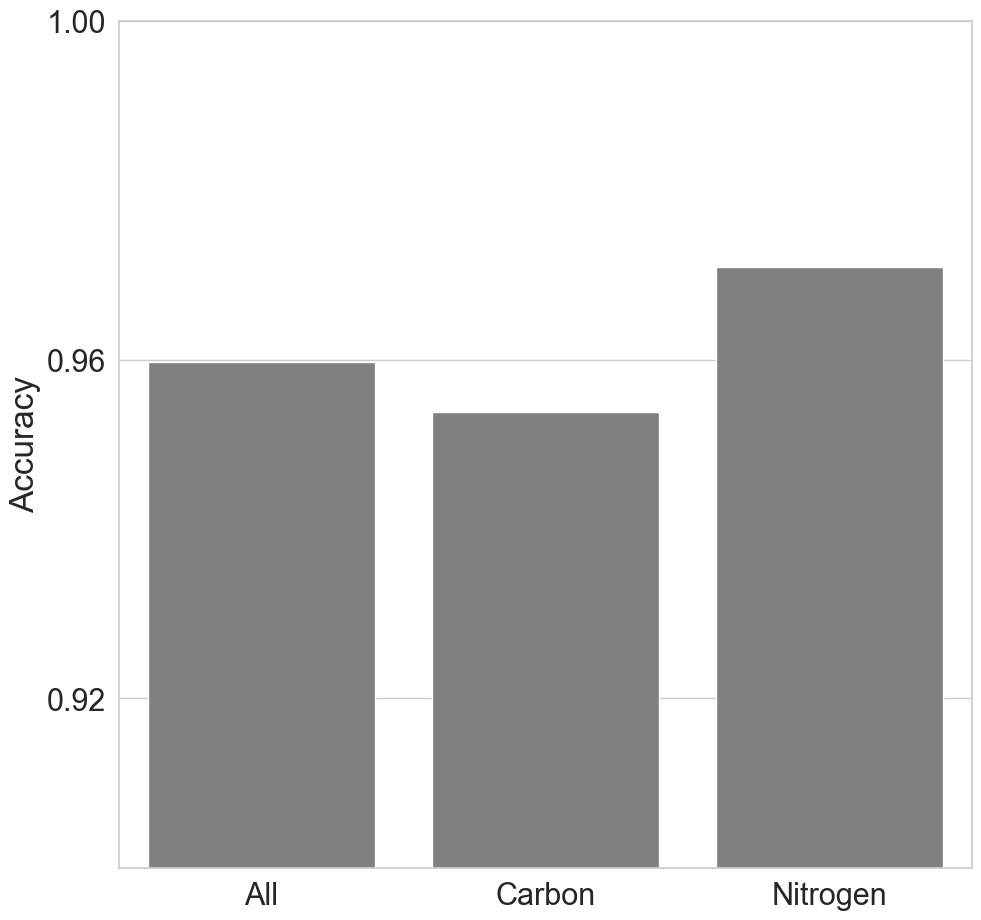

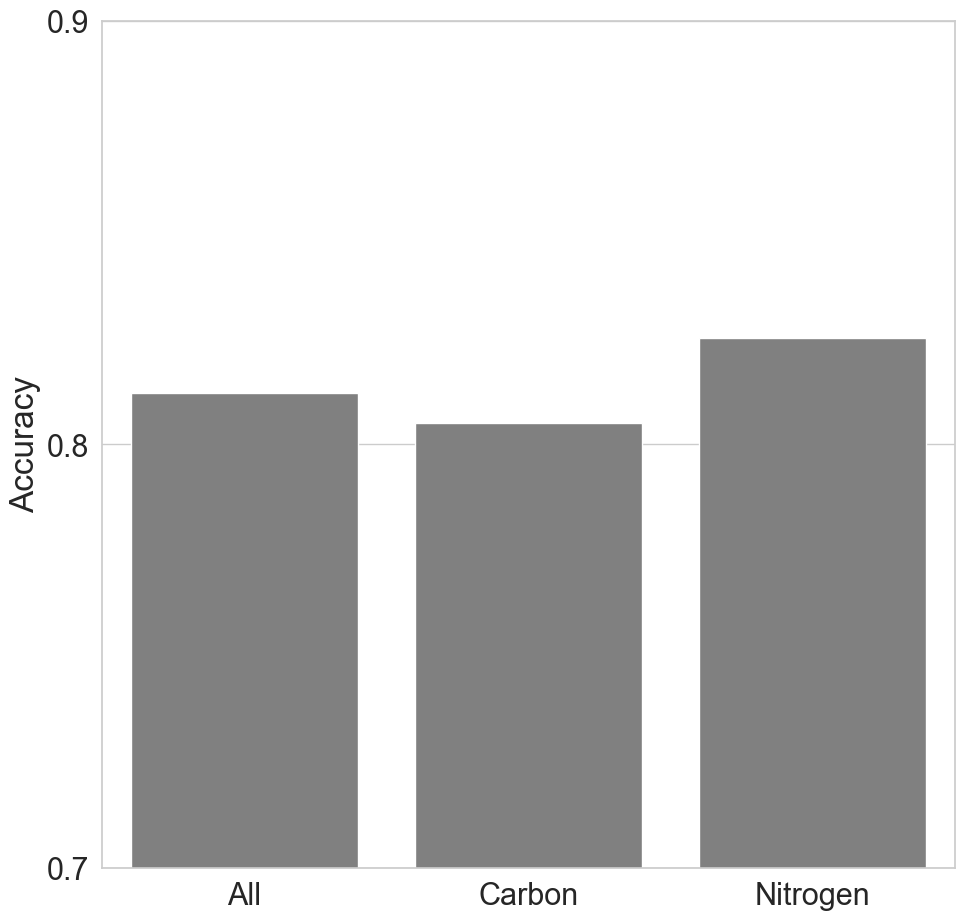

In [57]:
condition = ["All", "Carbon", "Nitrogen"]
acc_fit_AMN = [0.9597, 0.9538, 0.9709]
acc_cobra = [0.8121, 0.8051, 0.8252]

sns.set_theme(style='whitegrid', font='arial', font_scale=2, palette='colorblind')
sns.barplot(x=condition, y=acc_fit_AMN, color="grey")
# plt.errorbar(x = condition, y = acc_fit_AMN, yerr=std_fit_AMN, fmt='none', c='orange', capsize = 2)
plt.yticks([0.92, 0.96, 1.00])
plt.ylabel("Accuracy")
plt.ylim(0.9, 1)
plt.savefig("Figures/Fig5D."+FORMAT, format=FORMAT, dpi=800, bbox_inches = 'tight')
plt.show()
plt.close('all')

sns.barplot(x=condition, y=acc_cobra, color="grey")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.9)
plt.yticks([0.7, 0.8, 0.9])
plt.savefig("Figures/Fig5F."+FORMAT, format=FORMAT, dpi=800, bbox_inches = 'tight')
plt.show()
plt.close('all')

## Figure S1e

In [ ]:
plt.close('all')
fname = "Data_FigS1e.csv"
data = pd.read_csv("Result/Raw_data/"+fname)[:31]
sns.set_theme(font=font, style="whitegrid", palette="pastel", font_scale=1.5)
plt.figure(figsize=(8, 6), dpi=500)
sns.heatmap(data.transpose(), xticklabels=5, yticklabels=False,  cmap="YlGnBu")
plt.xlabel("Iterations")
# plt.savefig('Figures/FigS1E.png', dpi=600)
# plt.show()
plt.close('all')

## Figure S6d

In [ ]:
MM_LP_EB_r2 = pd.read_csv("./Result/Raw_data/MM_LP_EB_r2.csv")
MM_QP_EB_r2 = pd.read_csv("./Result/Raw_data/MM_QP_EB_r2.csv")
MM_LP_UB_r2 = pd.read_csv("./Result/Raw_data/MM_LP_UB_r2.csv")
MM_QP_UB_r2 = pd.read_csv("./Result/Raw_data/MM_QP_UB_r2.csv")

plt.close("all")
sns.set_theme(font=font, style="whitegrid", palette="pastel", font_scale=1.70)
sns.lineplot(x='iteration', y='r2', data=MM_LP_EB_r2, label='EB - LP')
sns.lineplot(x='iteration', y='r2', data=MM_LP_UB_r2, label='UB - LP')
sns.lineplot(x='iteration', y='r2', data=MM_QP_EB_r2, label='EB - QP')
sns.lineplot(x='iteration', y='r2', data=MM_QP_UB_r2, label='UB - QP')
plt.xscale("log")
plt.legend(loc='lower right', prop={'size':12})
plt.xlabel("Solver Iterations")
plt.ylabel("$R^2$")
plt.xlim(10,10000)
plt.ylim(0,1)
# plt.savefig('Figure/FigS6b.jpg', format='jpeg', dpi=500, bbox_inches='tight')
# plt.show()

## Figure S6e

In [ ]:
plt.close('all')
col_labels_loss = ["Iterations", "Loss Mean", "Loss Stdev"]

to_load = ["MM_LP_Loss_e_coli_core_EB.csv",
           "MM_LP_Loss_e_coli_core_UB.csv",
           "MM_QP_Loss_e_coli_core_EB.csv",
           "MM_QP_Loss_e_coli_core_UB.csv"]

# labels for each file (will appear on figure)
load_labels = ["EB - LP", "UB - LP", "EB - QP", "UB - QP"]

# sns.set_theme(font="Roboto", style="whitegrid", palette="pastel")
sns.set_theme(font=font, style="whitegrid", palette="pastel", font_scale=2.5)

plt.figure(figsize=(18, 12), dpi=800)

for fname in to_load:
    results = pd.read_csv("Result/Raw_data/"+fname, header=None, names=col_labels_loss)
    label = load_labels[to_load.index(fname)]
    results["Loss Stderr"] = 1.96*(results["Loss Stdev"] / 10) # for a 95% confidence interval standard error on 100 samples (100 different simulations with different Vin)
    plt.plot(results["Iterations"], results["Loss Mean"], label=label)
    plt.fill_between(results["Iterations"], results["Loss Mean"]-results["Loss Stderr"], results["Loss Mean"]+results["Loss Stderr"], alpha=0.2)

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlim(1)
plt.ylim(10e-6, 1)
plt.xlabel("Solver iterations")
plt.ylabel("Loss")
# plt.savefig("Figures/FigS6E.png", dpi=800, bbox_inches = 'tight')
# plt.show()
plt.close('all')

## Figure S7

In [ ]:
figS7, axs_S7 = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
figS7.subplots_adjust(wspace=0.4)
sns.set_theme(font='Arial', style="whitegrid", palette="pastel", font_scale=1.5)

axs_S7[0, 0].axis('off')

list_h_dim = sorted(glob.glob("./Result/Raw_data/hidden*"), key=len)
list_n_hidden = sorted(glob.glob("./Result/Raw_data/n_*"), key=len)
list_lr = sorted(glob.glob("./Result/Raw_data/learning*"))

### Hidden dim
for df_name in list_h_dim:
    df = pd.read_csv(df_name)
    sns.lineplot(x='epoch', y='val_loss', data=df, ax=axs_S7[0,1], label=df_name[23: -19])
axs_S7[0, 1].legend(loc="upper right", title="Dimension of Layer")
axs_S7[0, 1].set_xlabel("Epochs")
axs_S7[0, 1].set_ylabel("log(Loss)")
axs_S7[0, 1].set_xscale("log")
axs_S7[0, 1].set_xlim(1,100)

### Number of hidden layers
for df_name in list_n_hidden:
    df = pd.read_csv(df_name)
    sns.lineplot(x='epoch', y='val_loss', data=df, ax=axs_S7[1,0], label=df_name[21: -19])
axs_S7[1, 0].legend(loc="upper right", title="Number of Layers")
axs_S7[1, 0].set_xlabel("Epochs")
axs_S7[1, 0].set_ylabel("log(Loss)")
axs_S7[1, 0].set_xscale("log")
axs_S7[1, 0].set_xlim(1,100)
### Learning rate
for df_name in list_lr:
    df = pd.read_csv(df_name)
    sns.lineplot(x='epoch', y='val_loss', data=df, ax=axs_S7[1,1], label=df_name[26: -19])
axs_S7[1, 1].legend(loc="upper right", title="Learning Rate")
axs_S7[1, 1].set_xlabel("Epochs")
axs_S7[1, 1].set_ylabel("log(Loss)")
axs_S7[1, 1].set_xscale("log")
axs_S7[1, 1].set_xlim(1,100)
# figS7.savefig('Figure/FigS7.jpg', format='jpeg', dpi=500)
# plt.show()

## Figure S8

In [7]:
import json

all_data = pd.read_csv(DIRECTORY+'Dataset_input/rijs_iML1515_EXP2.csv')
true_df = all_data.iloc[:,89:]
trainname = "rijs_iML1515_EXP2_UB"
reservoirname = trainname + '_AMN_QP'
filename = DIRECTORY+'Result/Raw_data/'+reservoirname+'_PRED.json'
PRED = json.load(open(filename, "r"))
PRED = np.array(PRED)
PRED = np.mean(PRED, axis=0)
pred_df = pd.DataFrame(PRED, columns=true_df.columns)

var_weighted = r2_score(true_df.values, pred_df.values, multioutput='variance_weighted')
uniform = r2_score(true_df.values, pred_df.values, multioutput='uniform_average')

print(var_weighted, uniform)

Q2s = []
labels = []

for flux in true_df.columns:
    TRUE = true_df[flux]
    PRED = pred_df[flux]

    if "MEASURE" in flux:
        label = str(flux)[:-8]
    else:
        label = str(flux)

    if "BIOMASS" in flux:
        label="Growth Rate"

    Q2s.append(r2_score(TRUE, PRED))
    labels.append(label)

sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=1.4, rc={'figure.figsize':(11,11)})
# fig, ax = plt.subplots(figsize=(12, 8))

g = sns.barplot(x=labels, y=Q2s)
g.axhline(var_weighted, label="Variance Weighted Average Q²", color="red")
g.axhline(uniform, label="Uniform Average Q²")
g.legend(loc='best')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel("Q² between measured and predicted flux")
# plt.savefig("Figures/FigS8.png", dpi=600, bbox_inches='tight')
# plt.show()
plt.close('all')

0.9125203027479746 0.5960820258819362


## Figure S9

In [4]:
plt.close('all')
ref_xpal = "Dataset_experimental/EXP110.csv"
xpal_df = pd.read_csv(ref_xpal, header=0, index_col=0)
ref_gr_avg = xpal_df["GR_AVG"]
ref_gr_std = xpal_df["GR_STD"]

sns.set_theme(font=font, style="whitegrid", palette="colorblind", font_scale=3)

cobra_train = "Result/Raw_data/Cobra_pred.csv"

to_plot = [cobra_train]
names = ['Q²=']

figure_names = ['FigS9']

for fname in to_plot:
    plt.close('all')

    plt.figure(figsize=(11, 11), dpi=800)
    
    identity = [min(ref_gr_avg), max(ref_gr_avg)]

    data = pd.read_csv(fname, header=None, delimiter=",").astype(np.float32)
    preds_avg=data.iloc[:,0].to_list()
    q2 = r2_score(ref_gr_avg.to_list(), preds_avg)
    plt.plot(identity, identity, ':')
    plt.scatter(ref_gr_avg, preds_avg, zorder=1)
    plt.errorbar(ref_gr_avg, preds_avg, xerr=ref_gr_std, ls="none", zorder=0)
        
    plt.xlabel("Measured growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
    plt.ylabel("Predicted growth rate (."+ r'$\mathregular{hr^{-1}}$' +")")
    plt.xlim(0, 0.5)
    plt.ylim(0, 0.5)
    plt.xticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
    plt.yticks([0.1,0.2,0.3,0.4],['0.1','0.2','0.3','0.4'])
    # plt.savefig("Figures/"+figure_names[to_plot.index(fname)]+'.png', dpi=800, bbox_inches = 'tight')
    # plt.show()
    plt.close('all')

## Figure S10

In [ ]:
from matplotlib.lines import Line2D

fname = "Result/Raw_data/Data_FigS10_AMN.csv"
plt.close('all')
plt.figure(figsize=(6, 6), dpi=800)
sns.set_theme(font=font, style="white", palette="colorblind", font_scale=1.5)
data = pd.read_csv(fname, header=0, delimiter=",").astype(np.float32)

sns.lineplot(data=data, x="Training Set Size", y="AMN Q2")
plt.ylabel("AMN Q²")
plt.yticks([0.8,0.9,1.0],['0.8','0.9','1.0'])
ax2 = plt.twinx()
sns.lineplot(data=data, x="Training Set Size", y="AMN Loss", ax=ax2, color="orange")
plt.legend(handles=[Line2D([], [], marker='_', color="b", label='Q²'), Line2D([], [], marker='_', color="orange", label='Loss')], loc=7)
plt.xscale('log')
# plt.savefig("Figures/FigS10a.png", dpi=600, bbox_inches = 'tight')
# plt.show()
plt.close('all')

In [4]:
from matplotlib.lines import Line2D

fname = "Result/Raw_data/Data_FigS10_ANN.csv"
plt.close('all')
plt.figure(figsize=(6, 6), dpi=800)
sns.set_theme(font=font, style="white", palette="colorblind", font_scale=1.5)
data = pd.read_csv(fname, header=0, delimiter=",").astype(np.float32)


sns.lineplot(data=data, x="Training Set Size", y="ANN Q2")
plt.ylabel("ANN Q²")
plt.yticks([0.5,0.75,1.0],['0.5','0.75','1.0'])
ax2 = plt.twinx()
sns.lineplot(data=data, x="Training Set Size", y="ANN Loss", ax=ax2, color="orange")
plt.legend(handles=[Line2D([], [], marker='_', color="b", label='Q²'), Line2D([], [], marker='_', color="orange", label='Loss')], loc=7)
plt.xscale("log")
# plt.savefig("Figures/FigS10b.png", dpi=600, bbox_inches = 'tight')
# plt.show()
plt.close('all')